In [120]:
import pandas as pd
########
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_predict

from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')

In [121]:
df = pd.read_csv('Covid_data.csv', sep=',')
df.head(3)

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,12/31/2019,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,1/1/2020,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,1/2/2020,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [122]:
df_ = df.drop(['iso_code','Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis = 1)
df_.head(2)

,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,Afghanistan,12/31/2019,0.0,0.0,0.0,38928341,1803.987,0.498
1,Afghanistan,1/1/2020,0.0,0.0,0.0,38928341,1803.987,0.498


In [123]:
df1 = df_.dropna(axis=0)
df1.head(2)

,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,Afghanistan,12/31/2019,0.0,0.0,0.0,38928341,1803.987,0.498
1,Afghanistan,1/1/2020,0.0,0.0,0.0,38928341,1803.987,0.498


# Non-transfromed Data

       # Plot 1.
The gross domestic product (gdp per capita) indicates very low as the human development index very major percentage of it dispersed in the scale range of 0.4 to 1, and the cluster of data sets in the figure below has a downward parabolic curve.

<AxesSubplot:xlabel='gdp_per_capita', ylabel='human_development_index'>

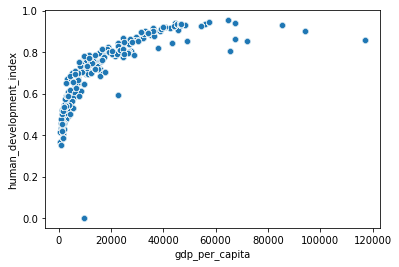

In [124]:
sns.scatterplot(data=df_, x="gdp_per_capita", y="human_development_index")

# Log-transformation

The target variable(features) in a log-level regression model is log-transformed, while the parameters are not. We must first exponentiate the coefficients of the variables before we can interpret the coefficients of a log-level regression.The data type in linear or regular form was skewed.

The data from the plot above is significantly different because it is now linearly skewed as a result of the data transformation.

In [140]:
df1['gdp_per_capita']= df1['gdp_per_capita'].apply(lambda x: np.log(x + 1))
df1['total_deaths'] = df1['total_deaths'].apply(lambda x: np.log(x + 1))
df1['total_cases'] = df1['total_cases'].apply(lambda x: np.log(x + 1))
df1['population'] = df1['population'].apply(lambda x: np.log(x + 1))
df1['stringency_index'] = df1['stringency_index'].apply(lambda x: np.log(x + 1))
df1['human_development_index'] = df1['human_development_index'].apply(lambda x: np.log(x + 1))

In [141]:
df1 = df1.dropna(axis=0)
X = df1.drop(['stringency_index','total_deaths', 'human_development_index'], axis=1)
y = df1['gdp_per_capita']

            # Plot 2.
 The really gdp_per_capita data shows slightly skewed to the right.

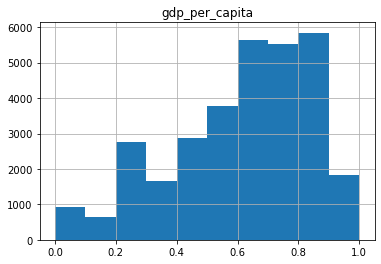

In [219]:
y.hist().set_title('gdp_per_capita')

plt.show()

      # Plot 3.
 After tranforming the data, the real gdp_per_capita data shows rapidly skewed to the right. 

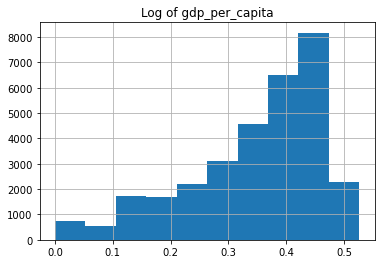

In [143]:
np.log1p(y).hist().set_title('Log of gdp_per_capita')

plt.show()

        # Plot 4.
The modified version of plot1, as shown below , clusters all the data with a minimal margin of error and shows an ascending form of functions.

<AxesSubplot:xlabel='gdp_per_capita', ylabel='human_development_index'>

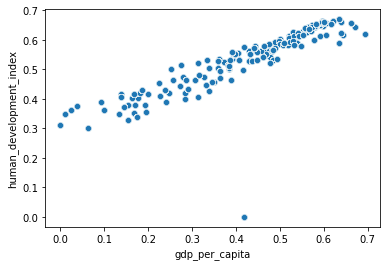

In [144]:
sns.scatterplot(data=df1, x="gdp_per_capita", y="human_development_index")

# dummy
constructs dummy variables with categorical features. I drop the column variable that the column dummy was used to allocate where the model was overfitting the dataset. Usually, this variable is used to split multiple groups.

In [145]:
df2 = pd.get_dummies(df1,drop_first=True)
df2.head(2)

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,location_Albania,location_Algeria,location_Angola,location_Argentina,...,date_9/28/2020,date_9/29/2020,date_9/3/2020,date_9/30/2020,date_9/4/2020,date_9/5/2020,date_9/6/2020,date_9/7/2020,date_9/8/2020,date_9/9/2020
0,0.0,0.0,0.0,2.916539,0.177142,0.404131,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,2.916539,0.177142,0.404131,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Normalization
Add a scaler to the data to normalize it. This demonstrates that each feature is processed evenly when in use.normalize the columns of total_cases, total_deaths, & gdp_per_capita.

In [146]:
normal = MinMaxScaler()
normalize = ['total_cases','total_deaths', 'gdp_per_capita']
normal_trans = pd.DataFrame(data = df1)
normal_trans[normalize] = normal.fit_transform(df1[normalize])
normal_trans.tail(3)

,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
50415,Zimbabwe,10/17/2020,0.648253,0.529713,1.67799,2.863022,0.26759,0.42853
50416,Zimbabwe,10/18/2020,0.648331,0.529713,1.67799,2.863022,0.26759,0.42853
50417,Zimbabwe,10/19/2020,0.648596,0.529713,1.67799,2.863022,0.26759,0.42853


# Correlation

Value is the proportion of a variable's variation between each features in the data set. The human development index has a 0.86 correlation with gdp per capita variables that indicates have linear relationship.Additionally, as the overall number of cases rises, so does the number of deaths, which is 0.92 & this also have positive relationship, research shows that when the number of cases rises, the death toll similarly rises. Nonetheless, there is a -0.14 correlation between the GDP and the population which is negative relationship.

In [147]:
df1.corr()

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
total_cases,1.000000,0.915779,0.395720,0.389613,0.251188,0.246688
total_deaths,0.915779,1.000000,0.248243,0.470490,0.255086,0.255559
stringency_index,0.395720,0.248243,1.000000,0.040776,-0.038076,-0.050384
population,0.389613,0.470490,0.040776,1.000000,-0.136268,-0.068230
gdp_per_capita,0.251188,0.255086,-0.038076,-0.136268,1.000000,0.862014
human_development_index,0.246688,0.255559,-0.050384,-0.068230,0.862014,1.000000


# Map
The heatmap plot displaying additional data details of the data's interrelationships.
Total_deaths and Total_cases have a higher correlation of 92%, and Gdp_per_Capita and Human_Development_Index are at the next level with an 86% correlation. In all of the columns of data given the correlation, Gdp_per_Capita has a lower correlation that doesn't have correlates with each other except with the Human_Development_Index.

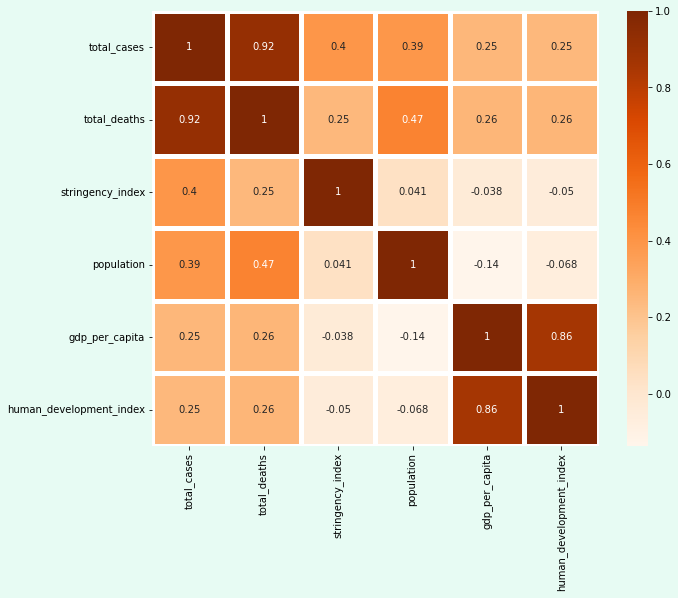

In [148]:
# the data correlation
plt.figure(figsize = [10, 8], clear = True, facecolor = '#e7fbf3')
sns.heatmap(df1.corr(), annot = True, square = False, linewidths = 5,
            linecolor = "white", cmap = "Oranges");

# METHODS

Split the data into training and testing sets of normalized dataset. presents the split function results for the training and testing sets, which have 22062 and 9456 samples, respectively.
   
       Regression Types:
   
using Linear Regression,Lasso Regression, Ridge Regression, StandardScaler, Pipeline with split functions & k-fold method. The k-fold cross validation method is used to evaluate how effectively the method performed on data.

In [217]:
xx =  normal_trans[['total_cases','total_deaths','stringency_index','population','human_development_index']]
yy = normal_trans['gdp_per_capita']

X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.3, random_state = 42)

print("Training: {} samples.".format(X_train.shape[0]))
print("Testing: {} samples.".format(X_test.shape[0]))

Training: 22062 samples.
Testing: 9456 samples.


# Cross- Validation & split function
I'm using cross-validation compares and evaluates classification algorithm by splitting data  for testing or training a model.
The use of a regression model with a small random state size and k-fold cross validation techniques makes it simpler to validate the variables.


# 1. Linear Regression

    # Variance & Pipeline
Determines the percentage of the dependent variable's variance that the independent variable. The variance scores of the variables exhibit fairly similar results to each other when using the Standard Scaler and Linear Regression, with values of 0.756 and 0.757, respectively.

In [214]:
k_fold = KFold(shuffle=True, random_state=54, n_splits=4)

#regression and K-fold cross validation
scaling = StandardScaler()
lrg = LinearRegression()

X_train_ = scaling.fit_transform(X_train)
lrg.fit(X_train_, y_train)
X_test = scaling.transform(X_test)  
y_pred = lrg.predict(X_test)
scaling_score = r2_score(y_test.values, y_pred)

# with pipeline
pipe = Pipeline([("scaler", scaling),("regression", lrg)])
preds_lrg = cross_val_predict(pipe, X_train, y_train, cv=k_fold)
lin_score = r2_score(y_train, preds_lrg)

lin_score, scaling_score

(0.7571553062614611, 0.7568279377533216)

# 1.a R^2 score
Regardless of the significance of the independent variable, a low R-squared value means that it does not explain much of the variation in the dependent variable.

In [215]:
lrg.score(X_test, y_test)

0.7568279377533216

# 1.b Linear RMSE
A Linear Regression model may fit a dataset more accurately as the result generates a lower RMSE.The simulated and observed data are more accurate since they are close to one another.at which RMSE is 0.030.

In [170]:
lin_Regr_rmse = mean_squared_error(y_test, lrg.predict(X_test))
lin_Regr_rmse

0.013029914331507629

In [152]:
# gdp_per_capita & stringency _index have high RMSE, which means they are highly correelates each other.
RMSE = mean_squared_error(df1['gdp_per_capita'], df1['stringency_index'])
RMSE

1.0755279455545173

In [153]:
# total_cases & total_deaths have very low RMSE, which means they aren't correelated to each other.
RMSE_ = mean_squared_error(df1['total_cases'], df1['total_deaths'])
RMSE_

0.03027196139442926

In [220]:
#df1['stringency_index'].plot(figsize=(20,5))

In [221]:
# prop= df1['total_cases'] / df1['human_development_index']
# ax1 = prop.plot(figsize=(20,5))

In [222]:
# global_proportion = df1['total_deaths'] / df1['gdp_per_capita']
# ax1 = global_proportion.plot(figsize=(20,5))

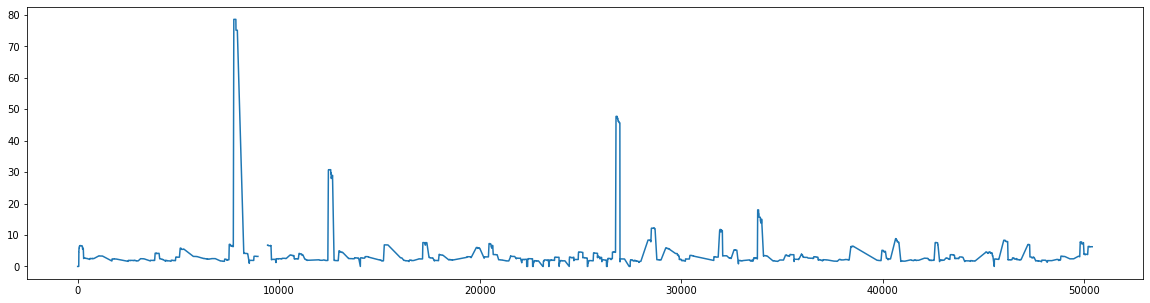

In [223]:
global_prop = df1['stringency_index'] / df1['gdp_per_capita']
ax1 = global_prop.plot(figsize=(20,5))

# 2. Lasso Regression

The lasso regression plot indicated a negative correlation between the variables' parameter values. This once again demonstrates that when alpha increases, model complexity decreases.

# Plot
The graphic demonstrates that as the alpha variable increases, the Root Squared decreases and approaches asymptotical zero, and as alpha values are lower, the Root Squared increases to > 80%, indicating that the variables are less diverse.

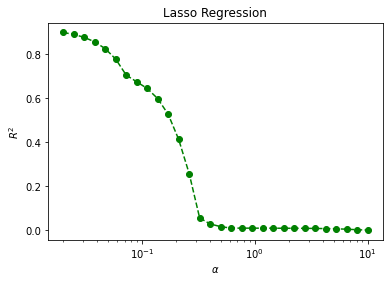

In [157]:
# Regression & Pipe line function

Poly = PolynomialFeatures(degree=5)
scores = []
alphas = np.geomspace(0.02, 10.0, 30)
predict_reg = []
for alpha in alphas:
    reg_alpha = Lasso(alpha=alpha, max_iter=10000)
    
    Pipe = Pipeline([("scaler", scaling), ("feature", Poly), ("lasso", reg_alpha)])

    predict_reg = cross_val_predict(Pipe, X_train, y_train)
    
    score = r2_score(y_train, predict_reg)
    
    scores.append(score)
plt.semilogx(alphas, scores, '--o', color='green')
plt.title('Lasso Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

# 2.a R^2 Score
the significance of the independent variable, a low R-squared value means that it does not explain much of the variation in the dependent variable.In contrast, Root Square's variation of 9.25% is relatively small.

In [203]:
pipe_lasso = Pipeline([
                    ("scaler", scaling),
                    ("Poly", PolynomialFeatures(degree=4)),
                    ("reg_alpha", Lasso(alpha=0.5))])

pipe_lasso.fit(X_train, y_train)
las_score = pipe_lasso.score(X_train, y_train)
las_score

0.009254834875907725

# 2.b Lasso RMSE
I'm taking into consideration that Lasso Regression generates a greater Root Mean Square Error than the regression types; when the test set's RMSE is considerably higher than the training set's, I definitely overfit the data, resulting in a model that performs well when tested within a sample but poorly predicts outcomes when tested outside of it, at which RMSE is 0.0515.

In [205]:
lasso_rmse = mean_squared_error(y_train, pipe_lasso.predict(X_train))
lasso_rmse

0.05155158643170242

# 3. Ridge Regression

# Plot
The plot demonstrates that as the data set variables increase, the Root Squared line becomes straight line, indicating that the data set is strongly overfitted along the variable lines. with a given value of > 93% indicates that the data set is less diversified. however, the plot shows a steady decline.

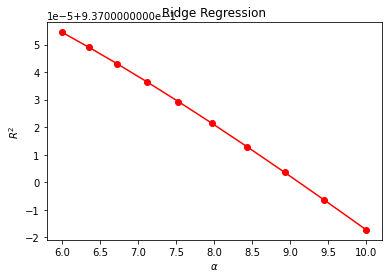

In [206]:
# ridge regression and K-fold cross validation
poly = PolynomialFeatures(degree=4)
alphas = np.geomspace(6, 10, 10)
scores=[]
preds_reg = []
for alpha in alphas:
    rid_reg = Ridge(alpha=alpha, max_iter=100000)

    pipe = Pipeline([
        ("scaler", scaling),
        ("feature", poly),
        ("reg_alpha", rid_reg)])

    preds_reg = cross_val_predict(pipe, X_train, y_train, cv = k_fold)
    
    score = r2_score(y_train, preds_reg)
    scores.append(score)

plt.plot(alphas, scores, '-o', color='red')
plt.title('Ridge Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

# 3.a R^2 Score
Higher R-squared values for the same data set imply less variance between the fitted values and the observed data. The proportion of variation in the dependent variable that a linear model controls has been quantified using R-squared. That indicates the Root Square's variation of 93.83% is relatively higher.

In [207]:
pipe_rid = Pipeline([
                    ("scaler", scaling),
                    ("Poly", PolynomialFeatures(degree=4)),
                    ("reg_alpha", Ridge(alpha=0.5))])

pipe_rid.fit(X_train, y_train)
rid_score = pipe_rid.score(X_train, y_train)
rid_score

0.9383014449704138

# 3.b Ridge RMSE
A Ridge Regression model may fit a dataset more accurately as the result generates a lower RMSE. When the RMSE is low, the simulated and observed data are more accurate since they are close to one another, at which RMSE is 0.00321.

In [208]:
ridge_rmse = mean_squared_error(y_train, pipe_rid.predict(X_train))
ridge_rmse

0.003210369835032685

# Data Frame
# Table 1.
The Table below, compares the results of the three regression models along the score values.

In [209]:
pd.DataFrame([[lin_score, las_score, rid_score]],columns=['linear', 'lasso', 'ridge'], index=['score'])


,linear,lasso,ridge
score,0.757155,0.009255,0.938301


# Table 2.
The table displays the model of regressions, the root scores, the root mean square error, and predictions of all the dataset.

In [224]:
result_df = pd.DataFrame({'Model': ['Linear Regression','Lasso Regression', 'Ridge Regression'],
                         'Score': [lin_score, las_score, rid_score], 
                         'RMSE' : [lin_Regr_rmse, lasso_rmse, ridge_rmse],
                         'Prediction': [preds_lrg, predict_reg,preds_reg]})
result_df

,Model,Score,RMSE,Prediction
0,Linear Regression,0.757155,0.013030,"[0.7909248035002171, 0.6247258661807228, 0.837..."
1,Lasso Regression,0.009255,0.051552,"[0.6141919230447888, 0.614191923053677, 0.6141..."
2,Ridge Regression,0.938301,0.003210,"[0.7795964647690476, 0.6109586207595415, 0.878..."


# CONCLUSION
Due to pandamic, the provided data cannot accurately reflect the global market's true impact. Due to a lack of equipment in some developing countries, there aren't enough cases to report. On the other hand, developed nations have sufficient testing facilities and offer more cases for both testing and showing. Perhaps gathering more frequent data on specific countries might help to produce more precise results when predicting the impact on GDP for a particular country.



The ridge regression has the best Root Squared of 93.8% but the lowest Root Mean Square Error of 3.2%, suggesting a more accurate relationship between the observed data and the training. Each regression produces different score values.

When applying linear regression, the score result for Root Squared is 75.7%, which falls between moderate and high data discrepancy. indicates a lower Root Mean Square Error of 1.3%, showing a more accurate relationship between the observed and training data.

There is no correlation between the variable data in the Lasso regression, which has a score value of root squared of 0.9%. In a similar way, the root mean square error of 5.1% is larger than the three regressions i took into consideration, indicating that it does not adequately describe the relationship between the training data and the observed data.

The Ridge regression type, which shows a relationship between the training and testing data sets, is the best model I would recommend using.

As a result, I would consider using the Ridge model, as it best fits the data in terms of accuracy scores.